In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\mehul\OneDrive\Documents\datasets\oasis_longitudinal_noNA.csv")

In [3]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3,27,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4,28,0.0,1689,0.712,1.039


In [4]:
for i in data.columns:
    print(i)

Subject ID
MRI ID
Group
Visit
MR Delay
M/F
Hand
Age
EDUC
SES
MMSE
CDR
eTIV
nWBV
ASF


In [5]:
print(data.Hand.unique())
print(data.Group.unique())
print(data.Visit.unique())
print(data.SES.unique())

['R']
['Nondemented' 'Demented' 'Converted']
[1 2 3 4 5]
[2 3 4 1 5]


In [6]:
type_outcome = pd.crosstab(index = data["Group"],columns="count")
type_outcome

col_0,count
Group,
Converted,37
Demented,127
Nondemented,190


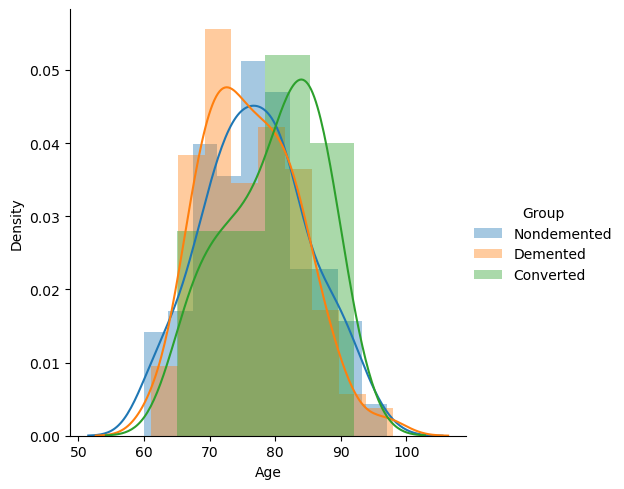

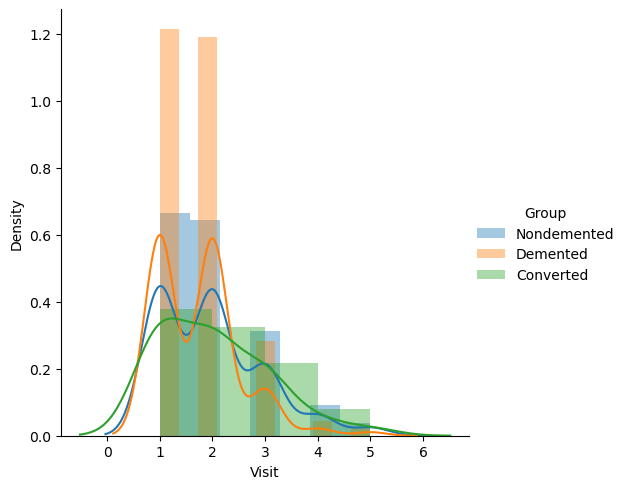

In [7]:
sns.FacetGrid(data,hue="Group",size=5).map(sns.distplot,"Age").add_legend()
sns.FacetGrid(data,hue="Group",size=5).map(sns.distplot,"Visit").add_legend()

plt.show()

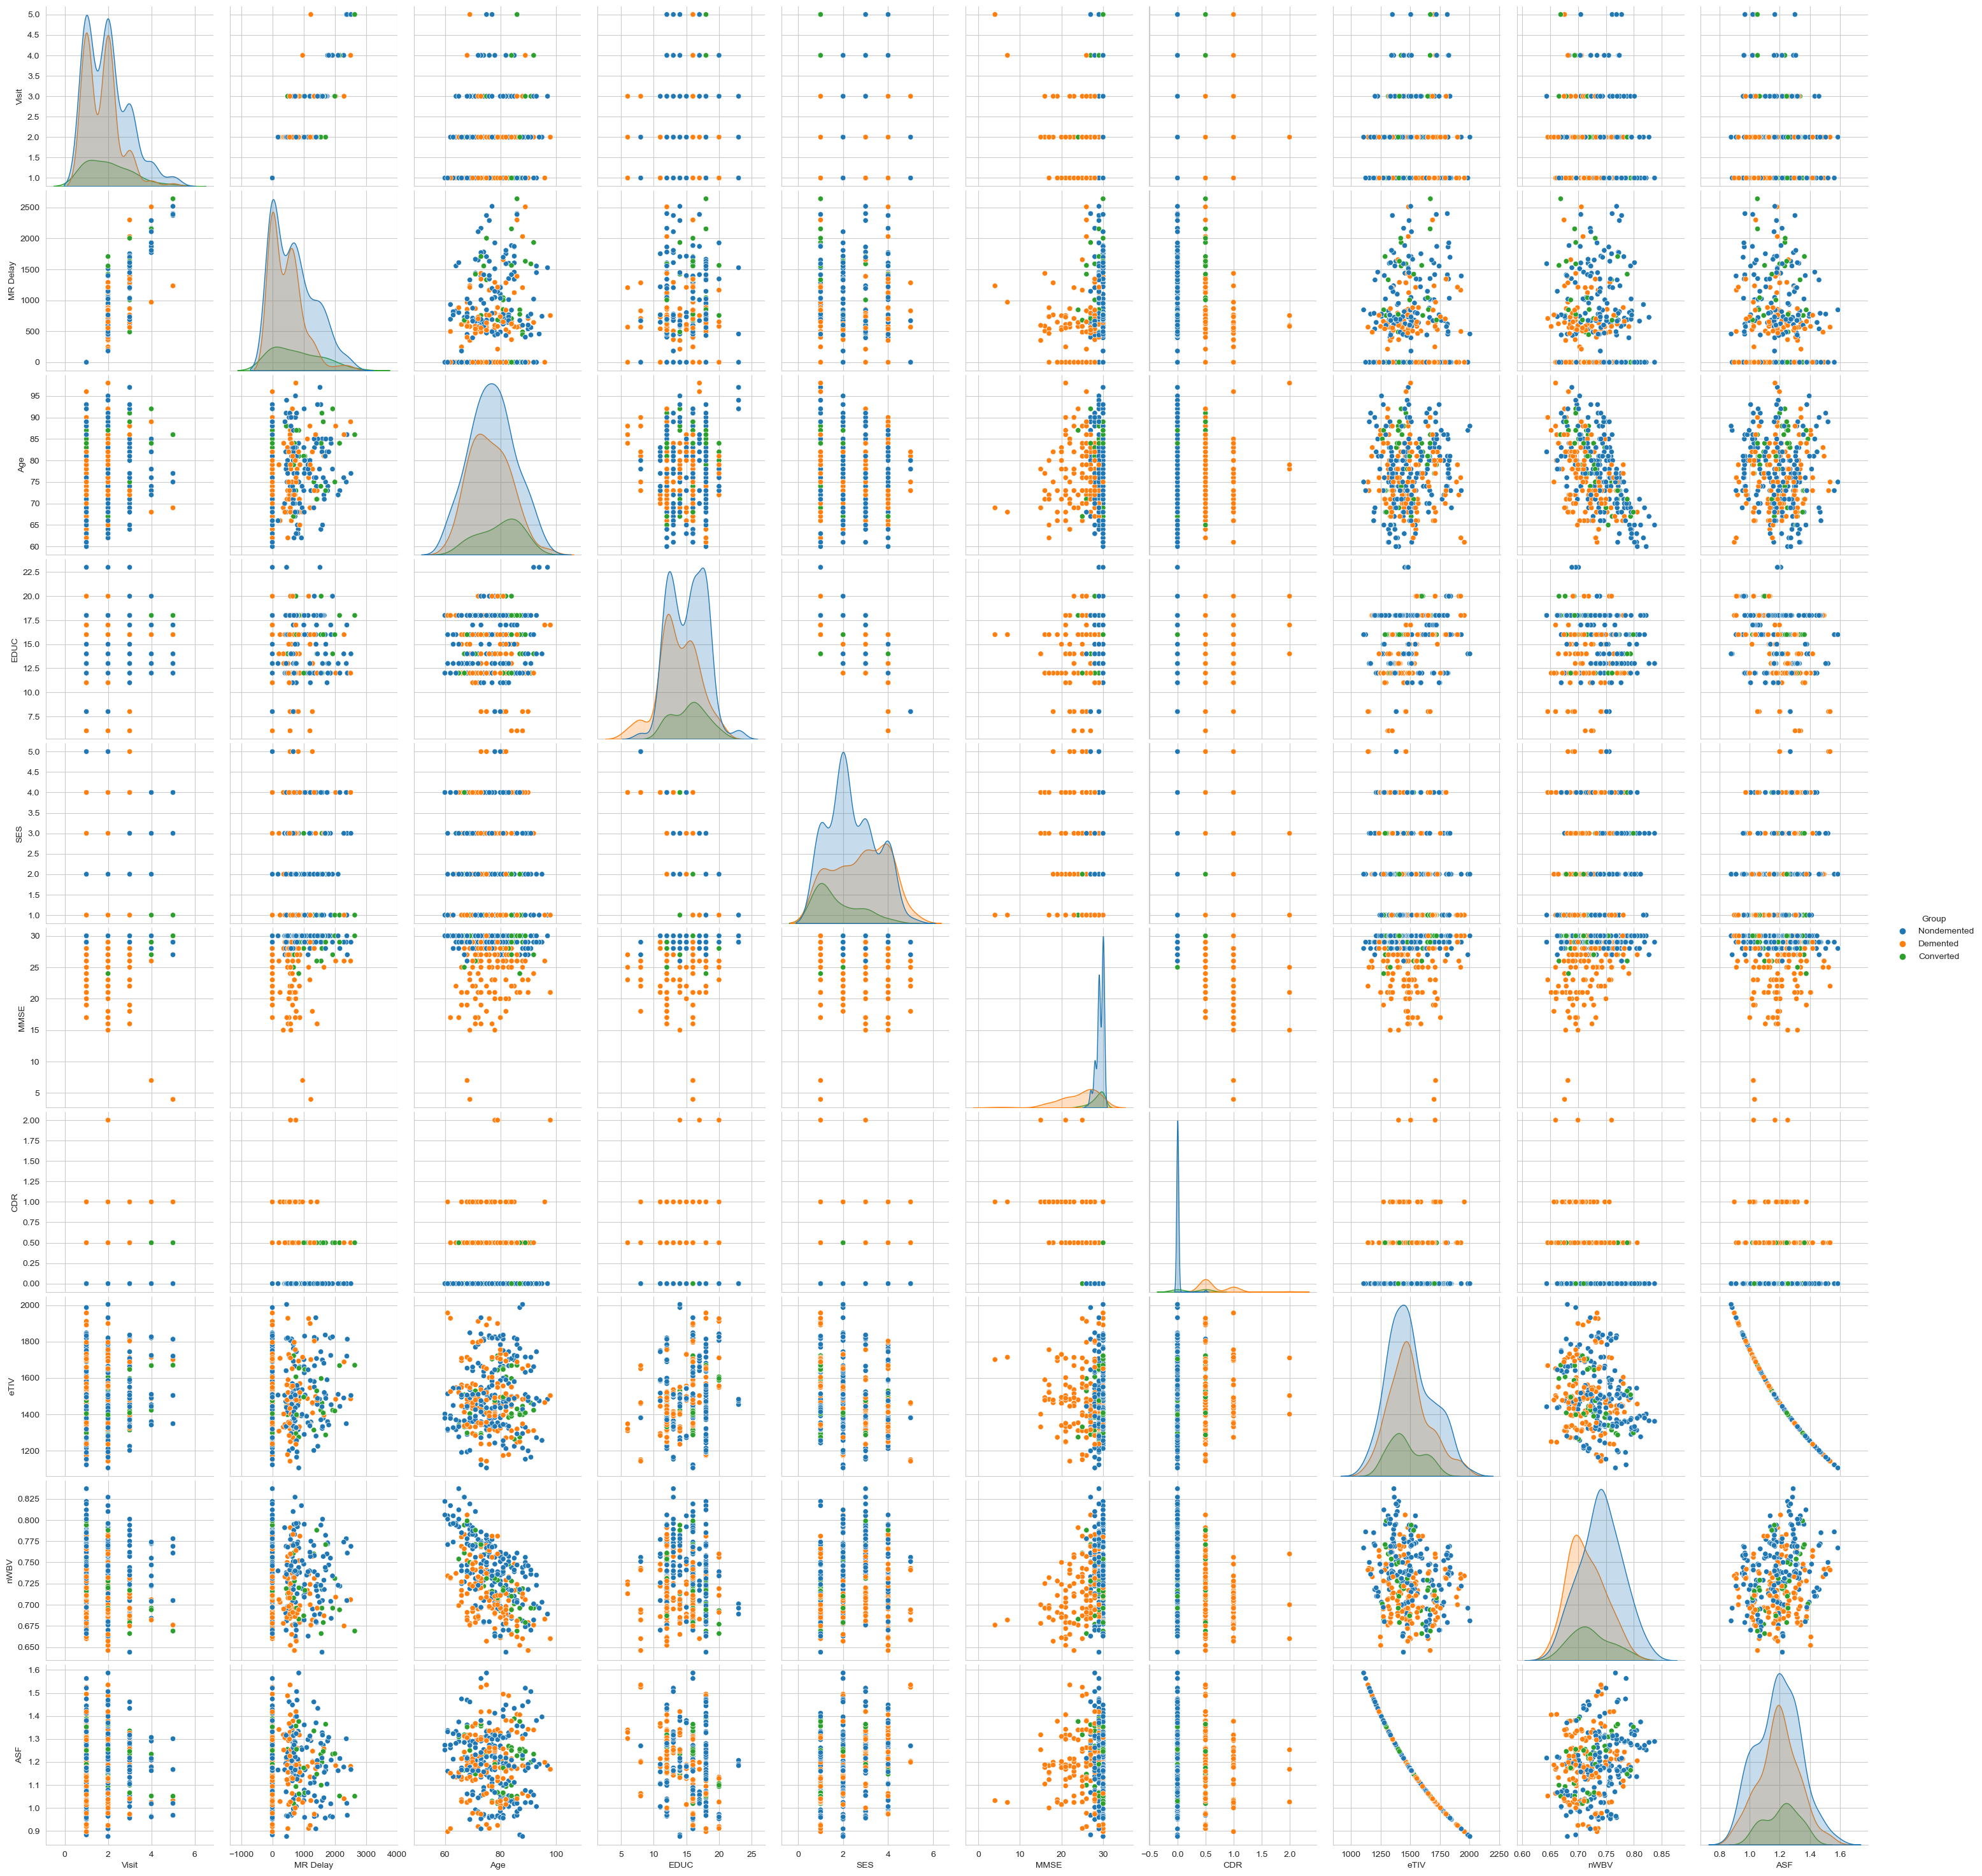

In [8]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Group",size=3)
plt.show()

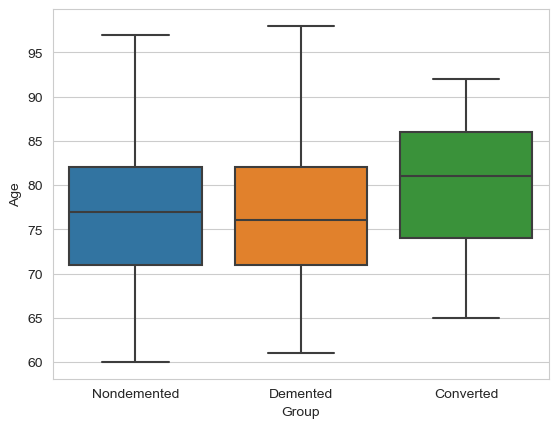

In [9]:
sns.boxplot(x="Group",y="Age",data=data)
plt.show()

In [10]:
data.drop(["Subject ID","Hand","MRI ID","Group"],axis=1,inplace=True)

In [11]:
data

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,87,14,2,27,0.0,1987,0.696,0.883
1,2,457,M,88,14,2,30,0.0,2004,0.681,0.876
2,1,0,F,88,18,3,28,0.0,1215,0.710,1.444
3,2,538,F,90,18,3,27,0.0,1200,0.718,1.462
4,1,0,M,80,12,4,28,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...
349,2,842,M,82,16,1,28,0.5,1693,0.694,1.037
350,3,2297,M,86,16,1,26,0.5,1688,0.675,1.040
351,1,0,F,61,13,2,30,0.0,1319,0.801,1.331
352,2,763,F,63,13,2,30,0.0,1327,0.796,1.323


In [12]:
data['M/F']= [1 if each=="F" else 0 for each in data['M/F']]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Visit     354 non-null    int64  
 1   MR Delay  354 non-null    int64  
 2   M/F       354 non-null    int64  
 3   Age       354 non-null    int64  
 4   EDUC      354 non-null    int64  
 5   SES       354 non-null    int64  
 6   MMSE      354 non-null    int64  
 7   CDR       354 non-null    float64
 8   eTIV      354 non-null    int64  
 9   nWBV      354 non-null    float64
 10  ASF       354 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 30.5 KB


In [14]:
data.isnull().sum()

Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [15]:
data.describe()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,0.576271,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.925330,640.596081,0.494848,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,559.500000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,882.500000,1.000000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [16]:
def impute_median(series):
    return series.fillna(series.median())

In [17]:
data["SES"] = data["SES"].transform(impute_median)
data["MMSE"] = data["MMSE"].transform(impute_median)

In [18]:
data.head(2)

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,0,87,14,2,27,0.0,1987,0.696,0.883
1,2,457,0,88,14,2,30,0.0,2004,0.681,0.876


In [19]:
data.EDUC.unique()

array([14, 18, 12, 16,  8, 20, 13,  6, 17, 15, 23, 11], dtype=int64)

In [20]:
data.columns = ["Visit","MR_Delay","gender","age","Edu_years","soc_eco_st","mini_mental_state_exam","clinical_dementia_rating","estimated_total_intracranial_volume","normalize_whole_brain_volume","atlas_scaling_factor"]


In [21]:
data.head()

,Visit,MR_Delay,gender,age,Edu_years,soc_eco_st,mini_mental_state_exam,clinical_dementia_rating,estimated_total_intracranial_volume,normalize_whole_brain_volume,atlas_scaling_factor
0,1,0,0,87,14,2,27,0.0,1987,0.696,0.883
1,2,457,0,88,14,2,30,0.0,2004,0.681,0.876
2,1,0,1,88,18,3,28,0.0,1215,0.710,1.444
3,2,538,1,90,18,3,27,0.0,1200,0.718,1.462
4,1,0,0,80,12,4,28,0.0,1689,0.712,1.039


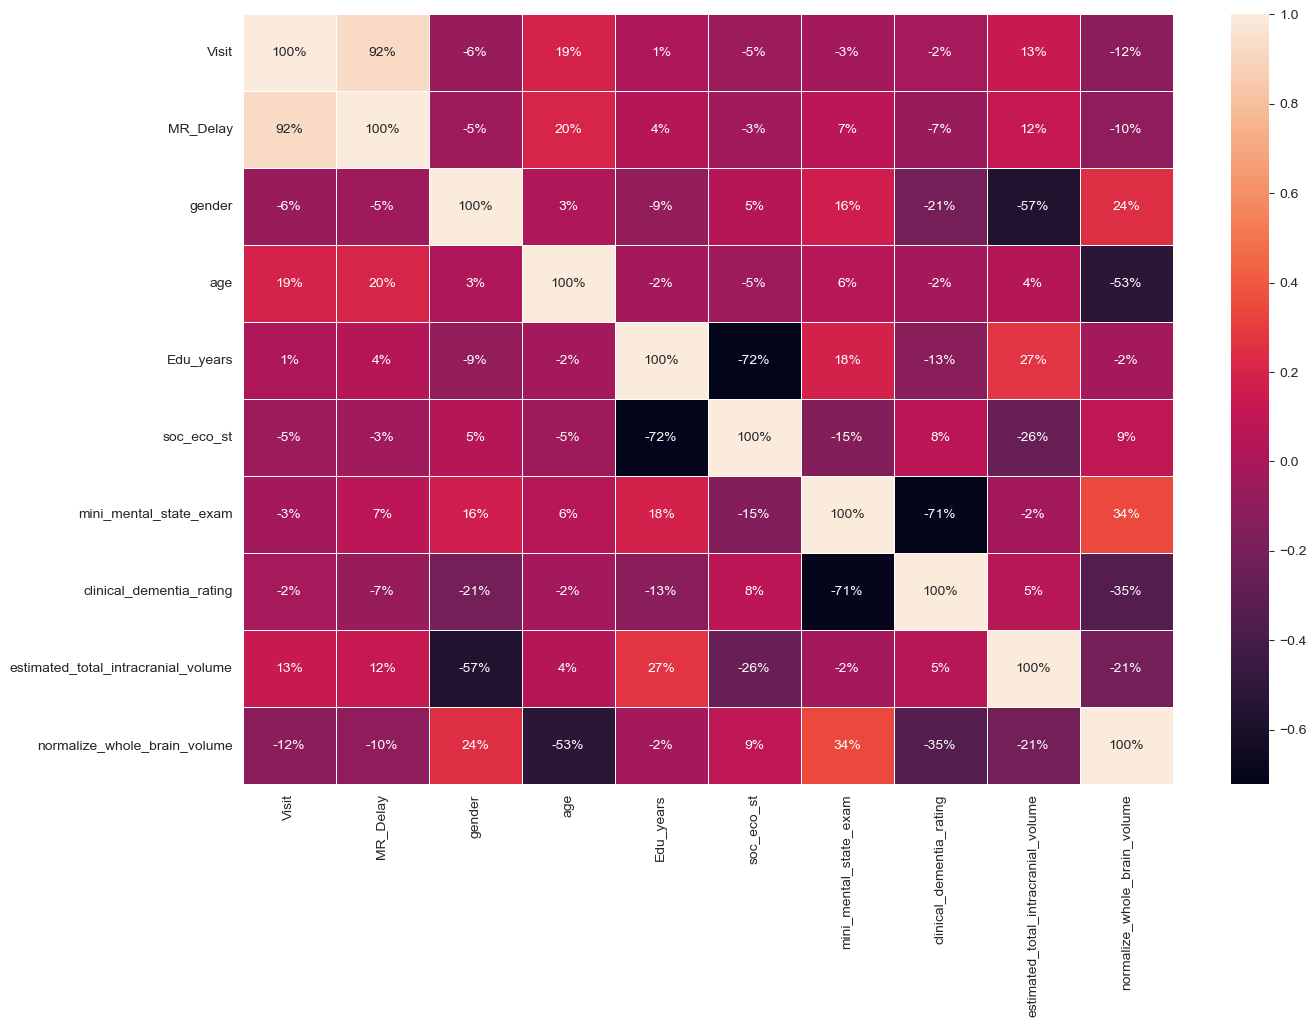

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.iloc[:,0:10].corr(), annot=True,fmt=".0%", linewidths=.5)
plt.show()

In [23]:
x = data.iloc[:, :].values

In [24]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 1.987e+03, 6.960e-01,
        8.830e-01],
       [2.000e+00, 4.570e+02, 0.000e+00, ..., 2.004e+03, 6.810e-01,
        8.760e-01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.215e+03, 7.100e-01,
        1.444e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.319e+03, 8.010e-01,
        1.331e+00],
       [2.000e+00, 7.630e+02, 1.000e+00, ..., 1.327e+03, 7.960e-01,
        1.323e+00],
       [3.000e+00, 1.608e+03, 1.000e+00, ..., 1.333e+03, 8.010e-01,
        1.317e+00]])

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

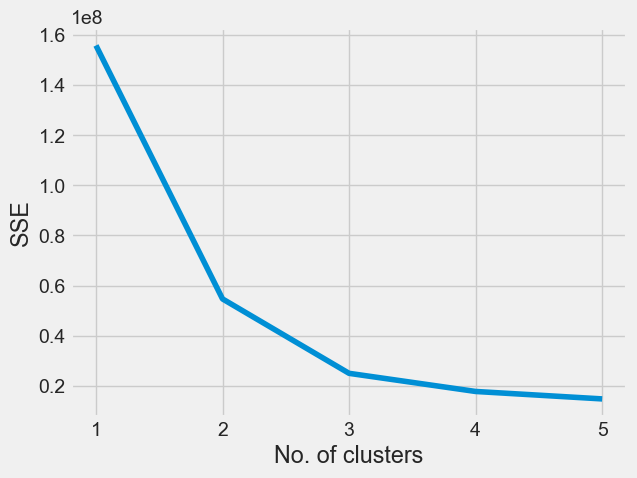

In [26]:
kmeans_kwargs = {"init":"random","n_init": 10,"max_iter": 300,"random_state": 42,}
sse = []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1,6),sse)
plt.xticks(range(1,6))
plt.xlabel("No. of clusters")
plt.ylabel("SSE")
plt.show()

In [27]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=500,
random_state=42
)
kmeans.fit(x)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [28]:
import seaborn as sns
from sklearn.model_selection import train_test_split
labels = kmeans.fit_predict(x)
labels = kmeans.labels_
pred = kmeans.predict(x)
labels

array([1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2,
       1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1,
       0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1,
       2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1,

In [29]:
from numpy import unique
clusters = unique(labels)
clusters

array([0, 1, 2])

In [30]:
data.head(1)

,Visit,MR_Delay,gender,age,Edu_years,soc_eco_st,mini_mental_state_exam,clinical_dementia_rating,estimated_total_intracranial_volume,normalize_whole_brain_volume,atlas_scaling_factor
0,1,0,0,87,14,2,27,0.0,1987,0.696,0.883


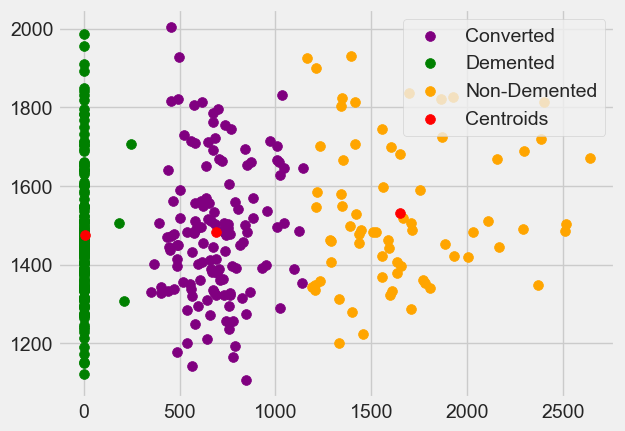

In [31]:
plt.scatter(x[labels==0, 1], x[labels==0, 8], s=50, c='purple', label = 'Converted')
plt.scatter(x[labels==1, 1], x[labels==1, 8], s=50, c='green',label='Demented')
plt.scatter(x[labels==2, 1], x[labels==2, 8], s=50, c='orange',label='Non-Demented')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,8], s=50, c='red', label='Centroids')

plt.legend(loc= 'upper right')
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouettescore = silhouette_score(data,pred, metric ='euclidean')
print('Silhouette Score: %.4f' % silhouettescore)

davies_bouldin_score_ = davies_bouldin_score(data, labels)
print('Davies Bouldin Score: %.4f' % davies_bouldin_score_)

Silhouette Score: 0.5936
Davies Bouldin Score: 0.5728
